In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')


# import numpy as np, h5py
# import scipy.io

# import numpy as np, h5py


import scipy.io
import hdf5storage  as hdf5

# # import augmentation
# # first set of experiments had 412:
# np.random.seed(412)
# np.random.seed(105)
set_nb_theme('monokai')

import numpy as np
import determine_roc as d
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
import numpy as np
import determine_roc as d
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

import scipy.io


/Users/xz186023/Desktop/assignment1/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0.8149197986460796
0.03454776795033986
0.8237010697621071
0.0359794009482344
0.8029776000494692
0.04592146412598523
0.8510182504086679
0.036088037138729566


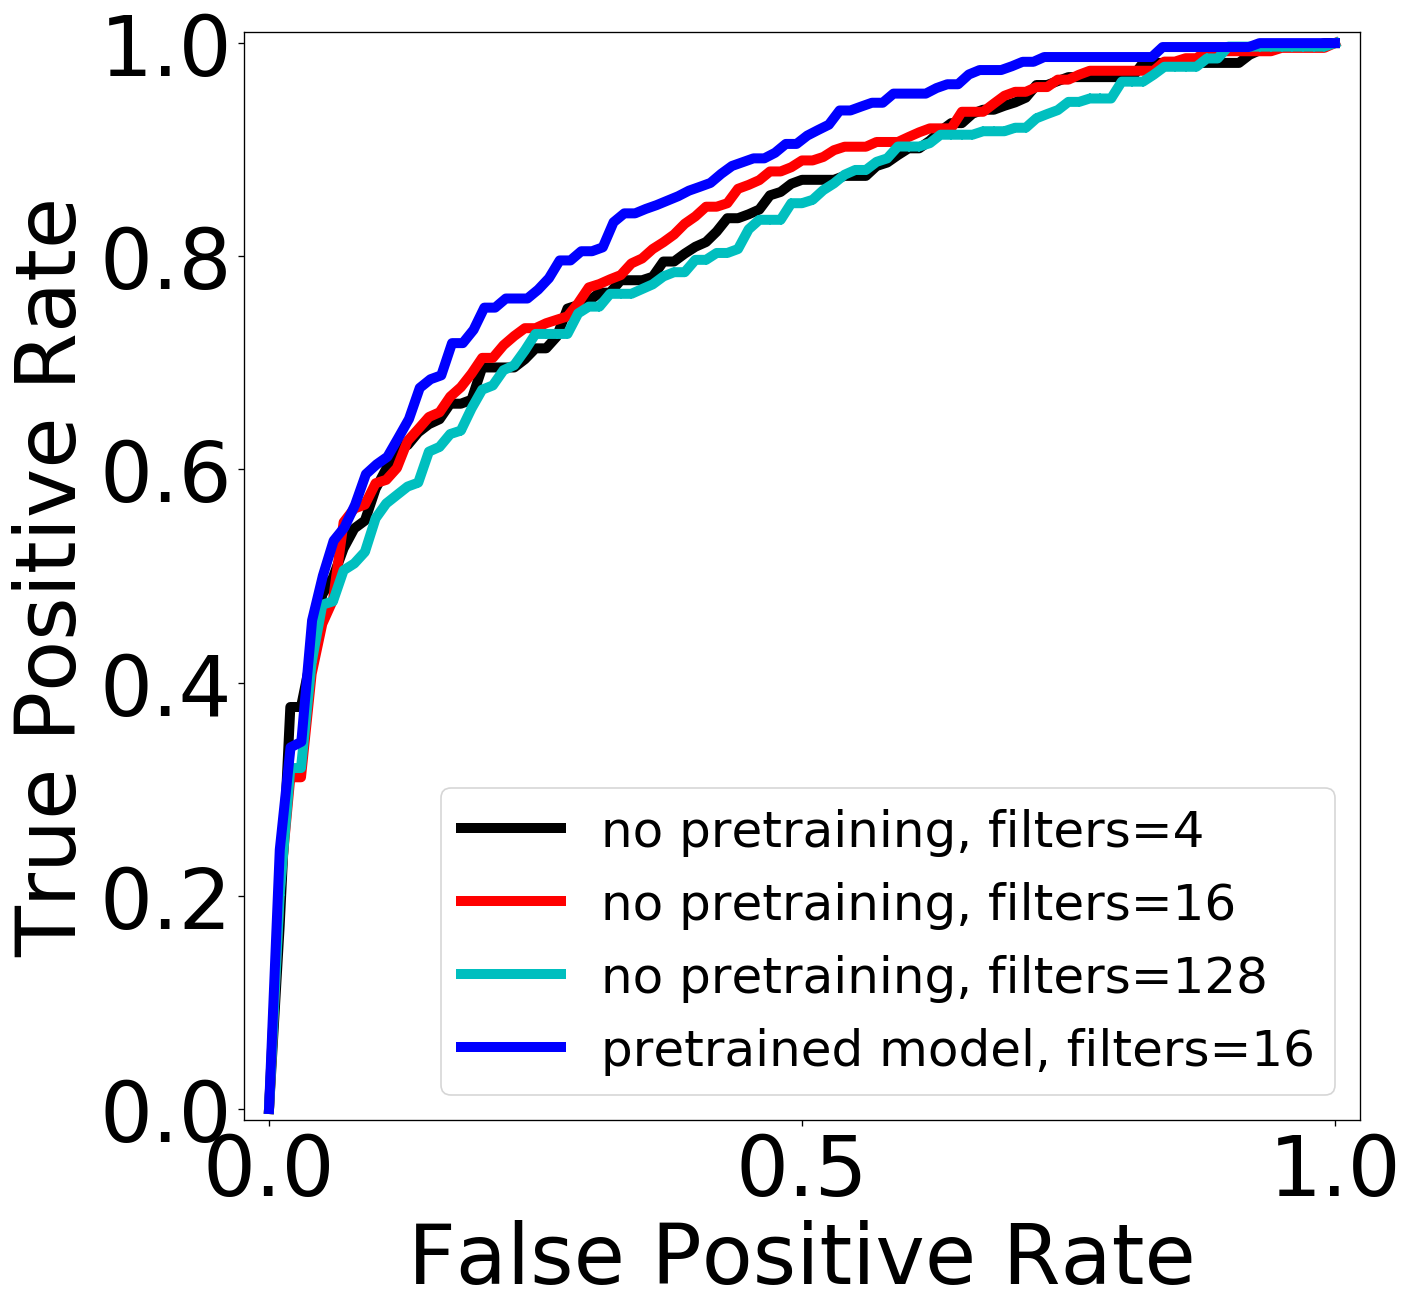

In [15]:
from scipy import interp

x = scipy.io.loadmat('10fold_accsTrue.mat')
# y = scipy.io.loadmat('10fold_accsFalse.mat')


yy1 = scipy.io.loadmat('nonpretrain_3x3x4.mat')
yy2 = scipy.io.loadmat('nonpretrain_3x3x16.mat')
yy3 = scipy.io.loadmat('nonpretrain_3x3x128.mat')
 

    


plt.close()
 
plt.rcParams.update({'font.size': 40})
plt.rc('xtick',labelsize=50)
plt.rc('ytick',labelsize=50)


fig=plt.figure(figsize=(12, 12), dpi= 120, facecolor='w', edgecolor='k')



# 1:
y = yy1
colors = ['darkorange']
fprs = []
tprs = []
aucs_=[]
base_fpr = np.linspace(0, 1, 101)
for i in range(9):
    preds_tot = y['logits_kfold'+str(i+1)].squeeze()[:,1]
    labels_tot = y['labels_kfold'+str(i+1)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
std *= 0.5
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'k',  label='no pretraining, filters=4',     
         linewidth=6.0)
# plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='m', alpha=0.1)
aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)


# 2:
y = yy2
colors = ['darkorange']
fprs = []
tprs = []
aucs_=[]
base_fpr = np.linspace(0, 1, 101)
for i in range(9):
    preds_tot = y['logits_kfold'+str(i+1)].squeeze()[:,1]
    labels_tot = y['labels_kfold'+str(i+1)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
std *= 0.5
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'r-',  label='no pretraining, filters=16',     
         linewidth=6.0)
# plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='m', alpha=0.1)
aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)

# 3:
y = yy3
colors = ['darkorange']
fprs = []
tprs = []
aucs_=[]
base_fpr = np.linspace(0, 1, 101)
for i in range(9):
    preds_tot = y['logits_kfold'+str(i+1)].squeeze()[:,1]
    labels_tot = y['labels_kfold'+str(i+1)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)
std *= 0.5
tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
#plt.plot(base_fpr, mean_tprs, 'c-+',  label='no pretraining, filters=128',     
         #linewidth=10.0, markersize=40)
plt.plot(base_fpr, mean_tprs, 'c-+',  label='no pretraining, filters=128',     
         linewidth=6.0)
# plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='m', alpha=0.1)
aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)

#





fprs = []
tprs = []
aucs_=[]
base_fpr = np.linspace(0, 1, 100)
for i in range(8):
    preds_tot = x['logits_kfold'+str(i+1)].squeeze()[:,1]
    labels_tot = x['labels_kfold'+str(i+1)].squeeze() 
    fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
    roc_auc = auc(fpr, tpr)
    lw = 2
    aucs_.append(roc_auc)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std
plt.plot(base_fpr, mean_tprs, 'b',  label='pretrained model, filters=16',
         linewidth=6.0)
# plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='b', alpha=0.1)
aucs_= np.array(aucs_)
aucs_avg = np.mean(aucs_)
aucs_std = np.std(aucs_)
print(aucs_avg)
print(aucs_std)



# plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.05, 1.01])
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

# Now add the legend with some customizations.
# legend = ax.legend(loc='upper center')

plt.legend( prop={'size': 30})

plt.ylabel('True Positive Rate', fontsize=50)
plt.xlabel('False Positive Rate', fontsize=50)
plt.axes().set_aspect('equal', 'datalim')


plt.show()

    

    

    
    
